<a href="https://colab.research.google.com/github/LiubovAnt/skolkovo_test/blob/task_2/z2/z2_graph_for_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Это библиотека, для генерации фейковых данных, чтобы инициализировать узлы именами.

In [5]:
try:
    from faker import Faker
except ModuleNotFoundError:
    ! pip install Faker
    from faker import Faker

Пример работы:

In [6]:
fake = Faker()
fake.name()

'Aaron Palmer'

Чтобы не изобретать велосипед для отрисовки графа воспользуюсь библиотекой [graphviz](https://pypi.org/project/graphviz/).

In [7]:
try:
    import graphviz
    from graphviz import Graph as VizGraph
except ModuleNotFoundError:
    ! pip install graphviz
    import graphviz
    from graphviz import Graph as VizGraph

Код для отрисовки графа, на основе: 
https://raw.githubusercontent.com/yandexdataschool/Practical_RL/master/week02_value_based/mdp.py


In [8]:
def plot_graph(nodes: set[str], 
               edges: set[tuple[str, str]],
               plot_size='30,30',
               rankdir='LR'):
    """
    Function for pretty drawing simple graph with graphviz library.
    Requirements:
    graphviz : https://www.graphviz.org/
    for ubuntu users: sudo apt-get install graphviz
    python library for graphviz
    for pip users: pip install graphviz
    :param nodes
    :param edges
    :param plot_size: size of graph plot
    :param rankdir: order for drawing
    :return: dot object
    """
    viz_graph = VizGraph(name='Graph')
    viz_graph.attr(rankdir=rankdir)
    for nosde in nodes:
        viz_graph.node(nosde)
    for edge in edges:
        viz_graph.edge(edge[0], edge[1])
    return viz_graph

Основной класс:

In [9]:
import random

from typing import Optional
from PIL import Image
from matplotlib import pyplot as plt


class SimpleGraph():
    """A simple graph without weights
    
    Attributes
    ----------
    graph : dict[str, list[str]]
        graph description 
        example:
            {
                "Anna": ["Bob"],
                "Bob": ["Anna"],
                "Same": []
            }
    nodes : set[str]
        graph nodes
    edges : set[tuple[str, str]]
        graph edges
    
    Methods
    -------
    add_node()
        Add node to graph
    add_edge()
        Add an edge between two existing nodes
    show()
        Show praph
    random_graph()
        Create random graph. Delete current graph
    _reset()
        Init empty graph. Delete current graph
    _make_cuple()
        Arrange nodes for writing to edge
    _save_img()
        Save the image of the 
    _check()
        Проверяет целостность графа
    """
    def __init__(self, graph: Optional[dict[str, list[str]]] = None):
        self.max_rendom_graph_size = 10
        if not graph:
            self._reset()
        else:
            self._check(graph)
            self.graph = graph
            self.nodes = set(graph.keys())
            self.edges = set()
            for key, vals in self.graph.items():
                for val in vals:
                    self.edges.add(self._make_cuple(key, val))
            
    def add_node(self, node_name: str):
        if node_name in self.graph:
            print("Node already exists")
        else:
            self.graph[node_name] = []
            self.nodes.add(node_name)
    
    def add_edge(self, node_1: str, node_2: str):
        assert node_1 in self.graph, "Node 1 does not exist"
        assert node_2 in self.graph, "Node 2 does not exist"
        assert node_2 not in self.graph[node_1], "Edge already exists"
        self.graph[node_1].append(node_2)
        self.graph[node_2].append(node_1)
        self.edges.add(self._make_cuple(node_1, node_2))
    
    def show(self):
        self._save_img()
        image = Image.open("/content/graph.png")
        plt.imshow(image)
        plt.show()
    
    def random_graph(self, n_nodes: Optional[int] = None):
        if not n_nodes:
            n_nodes = random.randint(1, self.max_rendom_graph_size)
        self._reset()
        nodes_list = [fake.name() for _ in range(n_nodes)]
        # add nodes
        for node in nodes_list:
            self.add_node(node)
        # add edges
        table = random.choices([0, 1], k=n_nodes*(n_nodes-1)//2)
        for i in range(n_nodes):
            node = nodes_list.pop()
            for i in range(len(nodes_list)):
                if table[i]:
                    self.add_edge(node, nodes_list[i])
            table = table[len(nodes_list):]

    def _reset(self):
        self.graph = {}
        self.nodes = set()
        self.edges = set()

    def _make_cuple(self, node_1: str, node_2: str) -> tuple:
        couple = [node_1, node_2]
        couple.sort()
        return tuple(couple)
    
    def _save_img(self, directory: str = "/content/", img_name: str = "graph"):
        viz_graph = plot_graph(self.nodes, self.edges)
        viz_graph.format = "png"
        viz_graph.view(filename=img_name, directory=directory)

    def _check(self, graph: Optional[dict[str, list[str]]] = None):
        if not graph:
            graph = self.graph
        for key in graph:
            try:
                for item in graph[key]:
                    assert key in graph[item], "Check graph dict"
            except KeyError:
                assert False, "Check graph dict"

Проверка работы основного класса 

In [10]:
my_graph = SimpleGraph()

In [11]:
my_graph_dict = {
    "Anna": ["Bob"],
    "Bob": ["Anna"],
    "Same": []
}
my_graph = SimpleGraph(my_graph_dict)

In [12]:
my_graph.graph

{'Anna': ['Bob'], 'Bob': ['Anna'], 'Same': []}

In [13]:
my_graph.nodes

{'Anna', 'Bob', 'Same'}

In [14]:
my_graph.edges

{('Anna', 'Bob')}

In [15]:
my_graph.add_node("Max")
my_graph.add_edge("Max", "Anna")
my_graph.graph

{'Anna': ['Bob', 'Max'], 'Bob': ['Anna'], 'Same': [], 'Max': ['Anna']}

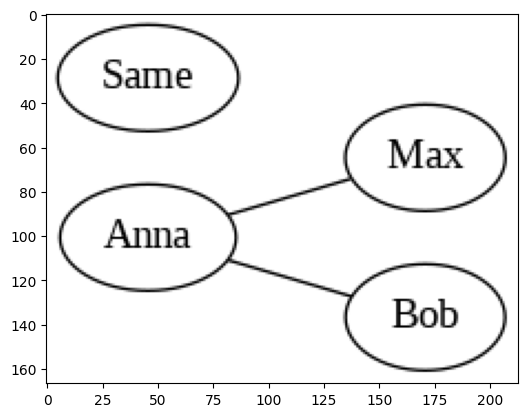

In [16]:
my_graph.show()

Задача эквивалентна задаче поиска максимального независимого множества в неориентированном графе. Это NP-hard задача. Код решения основан на https://www.geeksforgeeks.org/maximal-independent-set-in-an-undirected-graph/, но переписан, потому что оригинал на python написан не по pep8.

In [17]:
def get_max_independet_set(graph: dict[str, list[str]]) -> set:
    # empty graph or 1 node graph
    # recursion exit
    if not graph or len(graph)==1:
        return set(graph)
     
    # 1. Select a note from the graph
    current_note = list(graph.keys())[0]
     
    # --------------------
    # 2. Try to del current_note
    # --------------------
    # copy because dict is a mutable type
    del_graph = graph.copy()
     
    # delete current note
    del del_graph[current_note]
     
    # recursive call 
    del_result = get_max_independet_set(del_graph)
     
    # --------------------
    # 3. Try to save current_note
    # --------------------
    # delete neighbor nodes
    for neighbor_node in graph[current_note]:
        if neighbor_node in graph:
            del del_graph[neighbor_node]
     
    # recursive call
    save_result = get_max_independet_set(del_graph)
    save_result.add(current_note)

    # 4. Return max set
    if(len(del_result) > len(save_result)):
        return del_result
    return save_result

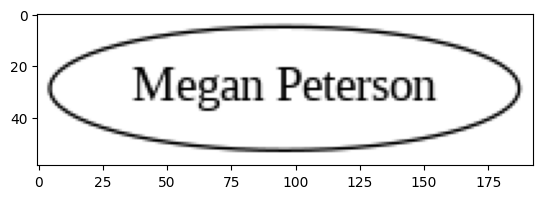

{'Megan Peterson'}

In [22]:
my_graph.random_graph()
my_graph.show()
get_max_independet_set(my_graph.graph)

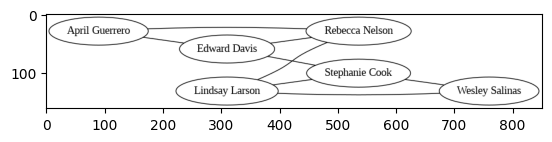

{'Edward Davis', 'Lindsay Larson'}

In [23]:
my_graph.random_graph()
my_graph.show()
get_max_independet_set(my_graph.graph)

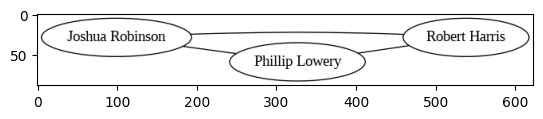

{'Robert Harris'}

In [24]:
my_graph.random_graph()
my_graph.show()
get_max_independet_set(my_graph.graph)

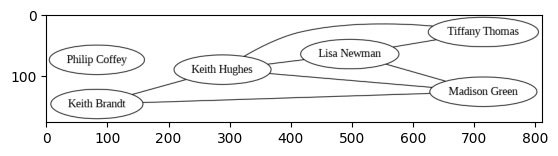

{'Keith Brandt', 'Philip Coffey', 'Tiffany Thomas'}

In [25]:
my_graph.random_graph()
my_graph.show()
get_max_independet_set(my_graph.graph)

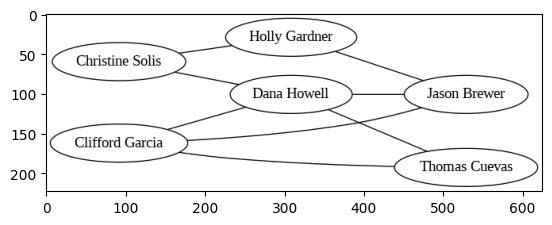

{'Christine Solis', 'Jason Brewer', 'Thomas Cuevas'}

In [26]:
my_graph.random_graph()
my_graph.show()
get_max_independet_set(my_graph.graph)